# Toronto Major Crimes
Data Source : https://open.toronto.ca/dataset/major-crime-indicators/
Official website : https://data.torontopolice.on.ca/
Data Sources : https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=3510017701

In [1]:
!pip install pandas

In [2]:
import pandas as pd

# from IPython.display import display

In [3]:
df2 = pd.read_csv('./major-crime-indicators.csv')

In [4]:
df2['DIVISION'].unique()

array(['D55', 'D42', 'D14', 'D53', 'D54', 'D12', 'NSA', 'D31', 'D52',
       'D51', 'D32', 'D43', 'D13', 'D41', 'D33', 'D11', 'D22', 'D23'],
      dtype=object)

### 1. Selecting Column
Selecting only necessary columns for the Analysis

In [5]:
df_crime = df2[['REPORT_DATE','REPORT_HOUR','DIVISION','LOCATION_TYPE','PREMISES_TYPE','OFFENCE','MCI_CATEGORY','NEIGHBOURHOOD_158','LONG_WGS84','LAT_WGS84']]

In [6]:
df_crime[df_crime['Premises'] == 'Apartment'].value_counts()

KeyError: 'Premises'

### 2. Mapping the Division Name
Map the Division with proper station name for better understanding on the visualization

In [7]:
# --------------------TORONTO POLICE DIVISIONS OFFICIAL NAMES--------------------
Divisions = {
    'D11': 'Davenport Division',
    'D12': 'Trethewey Division',
    'D13': 'Eglinton West Division',
    'D14': 'Dovercourt Division',
    'D22': 'Bloor West Division',
    'D23': 'Finch West Division',
    'D31': 'Norfinch Division',
    'D32': 'Ellerslie Division',
    'D33': 'Upjohn Division',
    'D41': 'Eglinton East Division',
    'D42': 'Milner Division',
    'D43': 'Lawrence East Division',
    'D51': 'Parliament Division',
    'D52': 'Dundas Division',
    'D53': 'Eglinton West Division',
    'D54': 'Cranfield Division',
    'D55': 'Coxwell Division',
    'NSA': 'No Specific Area'
}

### 3. Mapping the Postal Code for Each Neighbourhoo
The reason we need to map the postal code for each neighbourhood is to plot an exact GEO map for visualization


In [8]:
# ---------------------------POSTAL CODE FOR  Neighbourhood-------------------------------------
postalCode = {
  "Clairlea-Birchmount": "M1L",
  "Palmerston-Little Italy": "M6G",
  "Rosedale-Moore Park": "M4W, M4T",
  "Wellington Place": "M5V",
  "Corso Italia-Davenport": "M6H",
  "Etobicoke City Centre": "M9C",
  "Don Valley Village": "M2J",
  "New Toronto": "M8V",
  "Lawrence Park North": "M4N",
  "Edenbridge-Humber Valley": "M9A",
  "Blake-Jones": "M4J",
  "Humewood-Cedarvale": "M6C",
  "Annex": "M5R",
  "York University Heights": "M3J",
  "Weston": "M9N",
  "Alderwood": "M8W",
  "Willowridge-Martingrove-Richview": "M9R",
  "East End-Danforth": "M4C",
  "Kennedy Park": "M1K",
  "University": "M5S",
  "Golfdale-Cedarbrae-Woburn": "M1H",
  "Yonge-Bay Corridor": "M5B, M5E",
  "Glenfield-Jane Heights": "M3N",
  "Morningside Heights": "M1X",
  "Briar Hill-Belgravia": "M6E",
  "Maple Leaf": "M6L",
  "Fenside-Parkwoods": "M3A",
  "West Hill": "M1E",
  "St.Andrew-Windfields": "M2L",
  "Islington": "M9A",
  "South Riverdale": "M4M",
  "Lawrence Park South": "M4N",
  "Moss Park": "M5A",
  "Harbourfront-CityPlace": "M5V",
  "Rexdale-Kipling": "M9W",
  "Lansing-Westgate": "M2N",
  "Mimico-Queensway": "M8Y",
  "O'Connor-Parkview": "M4B",
  "Princess-Rosethorn": "M9A",
  "Junction Area": "M6P",
  "Roncesvalles": "M6R",
  "Kensington-Chinatown": "M5T",
  "Bayview Woods-Steeles": "M2H",
  "Flemingdon Park": "M4H",
  "Birchcliffe-Cliffside": "M1N",
  "St Lawrence-East Bayfront-The Islands": "M5E",
  "West Humber-Clairville": "M9W",
  "Church-Wellesley": "M4Y",
  "Dufferin Grove": "M6H",
  "Keelesdale-Eglinton West": "M6M",
  "Greenwood-Coxwell": "M4L",
  "Cliffcrest": "M1M",
  "Forest Hill North": "M6C",
  "Black Creek": "M3N",
  "Downtown Yonge East": "M5B",
  "Milliken": "M1V",
  "Bayview Village": "M2K",
  "Yonge-Doris": "M2N",
  "Clanton Park": "M3H",
  "Eringate-Centennial-West Deane": "M9C",
  "Bendale-Glen Andrew": "M1P",
  "Oakridge": "M1L",
  "Oakdale-Beverley Heights": "M3L",
  "Wexford/Maryvale": "M1R",
  "Downsview": "M3K",
  "Dorset Park": "M1P",
  "Playter Estates-Danforth": "M4K",
  "Trinity-Bellwoods": "M6J",
  "Oakwood Village": "M6E",
  "The Beaches": "M4E",
  "Agincourt South-Malvern West": "M1S",
  "Agincourt North": "M1V",
  "Banbury-Don Mills": "M3B",
  "Mount Olive-Silverstone-Jamestown": "M9V",
  "Bay-Cloverhill": "M5B",
  "Leaside-Bennington": "M4G",
  "North St.James Town": "M4X",
  "Dovercourt Village": "M6H",
  "Centennial Scarborough": "M1C",
  "Victoria Village": "M4A",
  "Humber Summit": "M9L",
  "Steeles": "M1V",
  "Thorncliffe Park": "M4H",
  "Humbermede": "M9M",
  "Wychwood": "M6G",
  "East Willowdale": "M2N",
  "North Toronto": "M4P",
  "Rockcliffe-Smythe": "M6N",
  "East L'Amoreaux": "M1W",
  "South Parkdale": "M6K",
  "Regent Park": "M5A",
  "West Queen West": "M6J",
  "Malvern East": "M1B",
  "Scarborough Village": "M1J",
  "Newtonbrook West": "M2R",
  "Woburn North": "M1G",
  "Little Portugal": "M6J",
  "Tam O'Shanter-Sullivan": "M1T",
  "Parkwoods-O'Connor Hills": "M3A",
  "Casa Loma": "M5R",
  "Fort York-Liberty Village": "M5V",
  "Willowdale West": "M2R",
  "Danforth": "M4K",
  "Yorkdale-Glen Park": "M6A",
  "Westminster-Branson": "M2R",
  "Thistletown-Beaumond Heights": "M9V",
  "Mount Dennis": "M6M",
  "West Rouge": "M1C",
  "Newtonbrook East": "M2M",
  "Markland Wood": "M9C",
  "Stonegate-Queensway": "M8Y",
  "Taylor-Massey": "M4C",
  "Old East York": "M4J",
  "High Park-Swansea": "M6S",
  "Malvern West": "M1B",
  "Highland Creek": "M1C",
  "Junction-Wallace Emerson": "M6P",
  "Humber Bay Shores": "M8V",
  "Beechborough-Greenbrook": "M6M",
  "Bedford Park-Nortown": "M5M",
  "Danforth East York": "M4C",
  "Eglinton East": "M1J",
  "Bendale South": "M1P",
  "Etobicoke West Mall": "M9C",
  "Morningside": "M1E",
  "Kingsway South": "M8X",
  "Guildwood": "M1E",
  "Englemount-Lawrence": "M6A",
  "Kingsview Village-The Westway": "M9R",
  "Yonge-St.Clair": "M4V",
  "High Park North": "M6P",
  "Avondale": "M2N",
  "Brookhaven-Amesbury": "M6M",
  "Humber Heights-Westmount": "M9A",
  "South Eglinton-Davisville": "M4S",
  "Hillcrest Village": "M2H",
  "Runnymede-Bloor West Village": "M6S",
  "Mount Pleasant East": "M4P",
  "Henry Farm": "M2J",
  "Pelmo Park-Humberlea": "M9N",
  "Rustic": "M6L",
  "Bathurst Manor": "M3H",
  "Weston-Pelham Park": "M6N",
  "Ionview": "M1K",
  "Broadview North": "M4K",
  "Elms-Old Rexdale": "M9W",
  "Caledonia-Fairbank": "M6E",
  "Yonge-Eglinton": "M4P",
  "Lambton Baby Point": "M6S",
  "Woodbine-Lumsden": "M4C",
  "Cabbagetown-South St.James Town": "M4X",
  "Forest Hill South": "M5P",
  "L'Amoreaux West": "M1W",
  "Bridle Path-Sunnybrook-York Mills": "M3B",
  "Long Branch": "M8W",
  "Woodbine Corridor": "M4L",
  "Pleasant View": "M2J",
  "North Riverdale": "M4K"
}

### 4. Filter Data
Selecting Records from Year = 2018 and we are not exclude all the Division with NSA( Not Specific areas) and also NSA Neighbhourhoods

In [9]:
# Select the data from 2018
df_crime = df_crime[
    (df_crime['REPORT_DATE'] > '2018')
    # (df_crime['DIVISION'] != 'NSA') &
    # (df_crime['NEIGHBOURHOOD_158'] !='NSA')
    ]

### 5. Rename the Column name
Rename the column for better understanding

In [10]:
# -------------------- Rename the Columns --------------------

df_crime = df_crime.rename(columns={'REPORT_DATE':'Report_Date','REPORT_HOUR':'Report_Hour','DIVISION':'Division_code','LOCATION_TYPE':'Location_type','PREMISES_TYPE':'Premises','OFFENCE':'Offence','MCI_CATEGORY':'Offence_category','HOOD_158':'Neighbourhood_Code','NEIGHBOURHOOD_158':'Neighbourhood_Name','LONG_WGS84':'Longitude','LAT_WGS84':'Latitude'})


In [11]:
df_crime['Division_code'].unique()

array(['D41', 'D14', 'D53', 'D52', 'D13', 'D22', 'D33', 'D32', 'D55',
       'D31', 'D12', 'D23', 'D54', 'D43', 'D42', 'D51', 'D11', 'NSA'],
      dtype=object)

### 6. Create a BIN for the Hour of Report
Create a BIN category for Reporting Hour to analysis the occurrence of the frequency of offence in different interval of the day

In [36]:
# Creating a BIN for the Hour
bin_edges = [0,4,8,12,16,20,23]  # Define bin edges
bin_labels = ['Midnight (0 - 4 AM)','Early Morning (4 - 8 AM)','Morning (8 - 12 AM)', 'Afternoon ( 12 - 4 PM)','Evening (16 -20 PM)','Late Night (20 -24 PM)']

# Mapping
df_crime['Hour_category'] = pd.cut(df_crime['Report_Hour'], bins=bin_edges, labels=bin_labels, include_lowest=True)


KeyError: 'Report_Hour'

### 7. Add three Columns (Country = Canada, Province = Ontario and City = Toronto )
The reason to add these columns is to locate a proper geo map for each areas

In [35]:
df_crime[df_crime['Premises'] =='Apartment']

,Report_Date,Hour,Hour_category,Offence,Offence_category,Location_type,Premises,Division_name,Country,Province,Neighbourhood Name,Postal_Code,Latitude,Longitude,Total
134018,2018-01-01,4:00:00,Midnight (0 - 4 AM),Assault With Weapon,Assault,"Apartment (Rooming House, Condo)",Apartment,Dovercourt Division,Canada,Ontario,Palmerston-Little Italy,M6G,43.661262,-79.410965,1
134024,2018-01-01,4:00:00,Midnight (0 - 4 AM),Assault,Assault,"Apartment (Rooming House, Condo)",Apartment,Upjohn Division,Canada,Ontario,Don Valley Village,M2J,43.781771,-79.346798,1
134028,2018-01-01,14:00:00,Afternoon ( 12 - 4 PM),Assault,Assault,"Apartment (Rooming House, Condo)",Apartment,Coxwell Division,Canada,Ontario,Blake-Jones,M4J,43.681476,-79.332368,1
134029,2018-01-01,14:00:00,Afternoon ( 12 - 4 PM),Assault,Assault,"Apartment (Rooming House, Condo)",Apartment,Coxwell Division,Canada,Ontario,Blake-Jones,M4J,43.681476,-79.332368,1
134030,2018-01-01,21:00:00,Late Night (20 -24 PM),Assault With Weapon,Assault,"Apartment (Rooming House, Condo)",Apartment,Eglinton West Division,Canada,Ontario,Humewood-Cedarvale,M6C,43.687195,-79.419947,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408906,2024-09-30,15:00:00,Afternoon ( 12 - 4 PM),Assault,Assault,"Apartment (Rooming House, Condo)",Apartment,Upjohn Division,Canada,Ontario,Bayview Village,M2K,43.766092,-79.371970,1
408908,2024-09-30,5:00:00,Early Morning (4 - 8 AM),Assault,Assault,"Apartment (Rooming House, Condo)",Apartment,Parliament Division,Canada,Ontario,North St.James Town,M4X,43.671251,-79.376421,1
408911,2024-09-30,15:00:00,Afternoon ( 12 - 4 PM),Discharge Firearm - Recklessly,Assault,"Apartment (Rooming House, Condo)",Apartment,Trethewey Division,Canada,Ontario,Rustic,M6L,43.703875,-79.502894,1
408915,2024-09-30,18:00:00,Evening (16 -20 PM),Robbery - Swarming,Robbery,"Apartment (Rooming House, Condo)",Apartment,Coxwell Division,Canada,Ontario,Taylor-Massey,M4C,43.696107,-79.291634,1


In [13]:

# Add Country and 
df_crime['Country'] = 'Canada'
df_crime['Province'] = 'Ontario'
# df_crime['City'] = 'Toronto'
df_crime['Total'] = 1

### 8 .Report Hour to String 
1. We converted the report hour to string for manipulation
2. Also remove the empty space and [] from the Neighbourhood

In [14]:
df_crime['Report_Hour'] = df_crime['Report_Hour'].astype(str)
# # Convert time
df_crime['Hour'] = df_crime['Report_Hour']+':00:00'

# Remove all the (**) Values from the Neighbourname
df_crime['Neighbourhood Name'] = df_crime['Neighbourhood_Name'].str.replace(r'\s*\(\d+\)', '', regex=True).str.strip()


### 9. Map the Division and Neighbourhood Postal code

Map the Division name for each division code
Map the Postal Code for each Neighbourhood Name

In [15]:
# Map the Police Division Names
df_crime['Division_name'] = df_crime['Division_code'].map(Divisions)
# Postal Code Mapping
df_crime['Postal_Code'] = df_crime['Neighbourhood Name'].map(postalCode)

In [ ]:
df_crime['Division_name'].unique()

array(['Eglinton East Division', 'Dovercourt Division',
       'Eglinton West Division', 'Dundas Division', 'Bloor West Division',
       'Upjohn Division', 'Ellerslie Division', 'Coxwell Division',
       'Norfinch Division', 'Trethewey Division', 'Finch West Division',
       'Cranfield Division', 'Lawrence East Division', 'Milner Division',
       'Parliament Division', 'Davenport Division', 'No Specific Area'],
      dtype=object)

### 10. Rearrange the column for better visual understand

In [17]:
# Column arrangement
df_crime = df_crime[['Report_Date', 'Report_Hour','Hour','Hour_category','Offence', 'Offence_category','Location_type', 'Premises','Division_code','Division_name','Country','Province','Neighbourhood Name','Postal_Code','Latitude','Longitude','Total']]

### 11. Drop the Unnecessary columns after finishing all the data pre-processing
such as Report_Hour, Division_code 

In [18]:
# drop Column
df_crime.drop(columns=['Report_Hour','Division_code'],axis=1,inplace=True)

In [19]:
df_crime.head(3)

,Report_Date,Hour,Hour_category,Offence,Offence_category,Location_type,Premises,Division_name,Country,Province,Neighbourhood Name,Postal_Code,Latitude,Longitude,Total
134017,2018-01-01,0:00:00,Midnight (0 - 4 AM),Assault Bodily Harm,Assault,Ttc Subway Station,Transit,Eglinton East Division,Canada,Ontario,Clairlea-Birchmount,M1L,43.712017,-79.280932,1
134018,2018-01-01,4:00:00,Midnight (0 - 4 AM),Assault With Weapon,Assault,"Apartment (Rooming House, Condo)",Apartment,Dovercourt Division,Canada,Ontario,Palmerston-Little Italy,M6G,43.661262,-79.410965,1
134019,2018-01-01,1:00:00,Midnight (0 - 4 AM),Assault,Assault,"Single Home, House (Attach Garage, Cottage, Mo...",House,Eglinton West Division,Canada,Ontario,Rosedale-Moore Park,"M4W, M4T",43.677771,-79.384859,1


In [20]:
df_crime['Offence_category'].unique()

array(['Assault', 'Auto Theft', 'Break and Enter', 'Theft Over',
       'Robbery'], dtype=object)

In [21]:
# ------------------------ SAVE and Export TO CSV File --------------------------------------------------

df_crime.to_csv('clean_major_crime_data.csv')

In [22]:
df_crime.columns

Index(['Report_Date', 'Hour', 'Hour_category', 'Offence', 'Offence_category',
       'Location_type', 'Premises', 'Division_name', 'Country', 'Province',
       'Neighbourhood Name', 'Postal_Code', 'Latitude', 'Longitude', 'Total'],
      dtype='object')

In [23]:
df_crime.head(1000).to_csv('test.csv')

## Recommendation for Visualization process / color choice

To recommend a theme and color palette for your Tableau dashboard, I'll consider the nature of the dataset (Toronto major crime records). Since crime data can be sensitive, a professional, clean, and easy-to-interpret dashboard is key.

### Recommended Dashboard Theme
1. **Title**: "Toronto Major Crime Dashboard"
2. **Theme Style**: 
   - **Minimalist and Modern**: Focus on clear, concise charts and text.
   - **Dark Mode Option**: Since this deals with crime, a dark theme can convey seriousness, but a light theme is equally acceptable for clarity.
   - **Interactive Elements**: Filters for neighborhoods, crime types, and time periods.

### Recommended Color Palette
#### Base Palette
- **Primary (Accent) Color**: Blue (#1f77b4) – conveys trust and clarity.
- **Neutral Background**: Light gray (#f5f5f5) or dark charcoal (#2b2b2b) for dark mode.
- **Highlight/Alert Color**: Red (#d62728) – for severe incidents or key highlights.
- **Secondary Colors**:
  - Orange (#ff7f0e) – to distinguish other important categories.
  - Green (#2ca02c) – to indicate decreases or positive trends.
  - Yellow (#ffdd44) – for warnings or neutral points.

#### Accessibility Considerations
- Ensure colors meet contrast guidelines for readability.
- Use icons, patterns, or labels to complement colors for colorblind users.

### Chart Recommendations
1. **Bar Chart**: Crime frequency by type or neighborhood.
2. **Heatmap**: Temporal analysis (e.g., crimes by time of day and month).
3. **Map Visualization**: Geographical crime data plotted on a Toronto map.
4. **Trend Line**: Year-over-year trends for crime rates.

Would you like me to analyze the dataset and suggest specific chart types based on its structure?

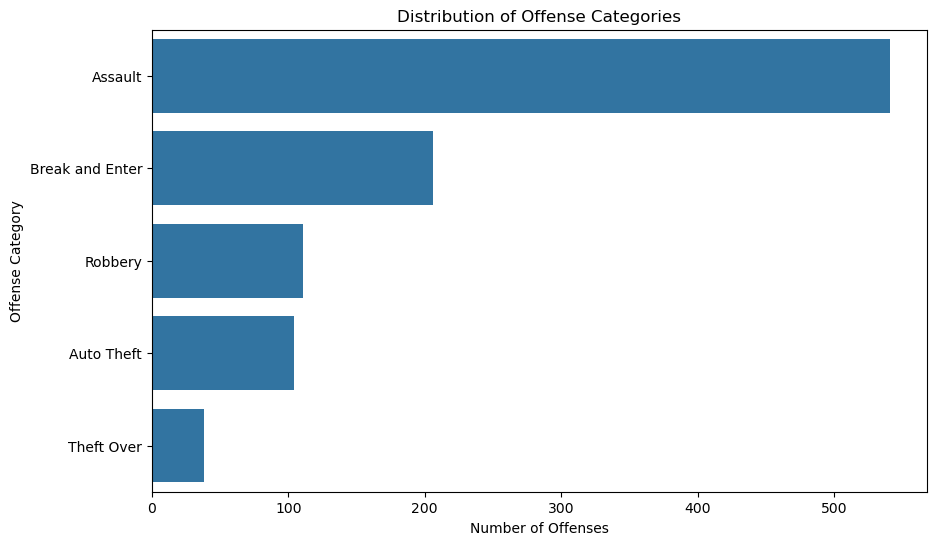

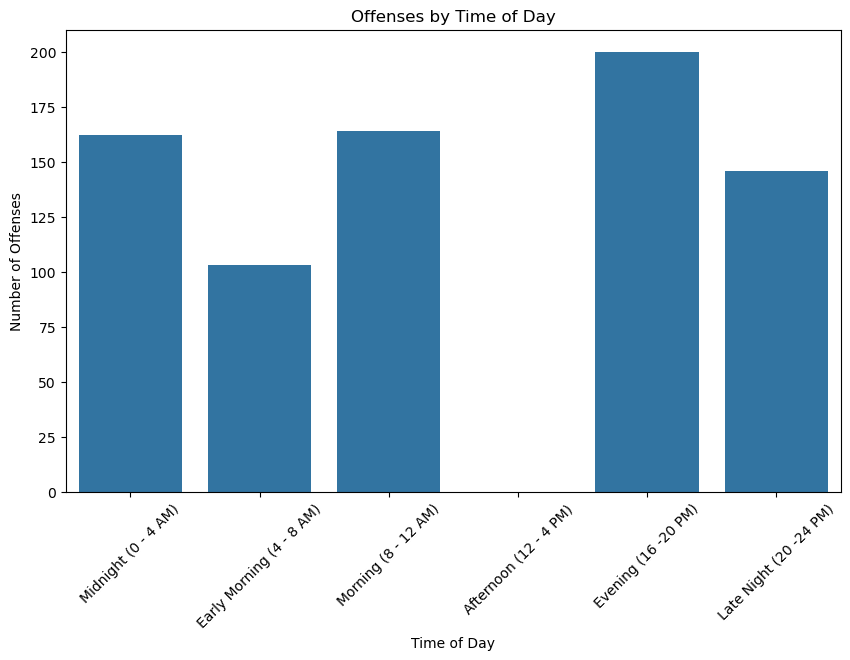

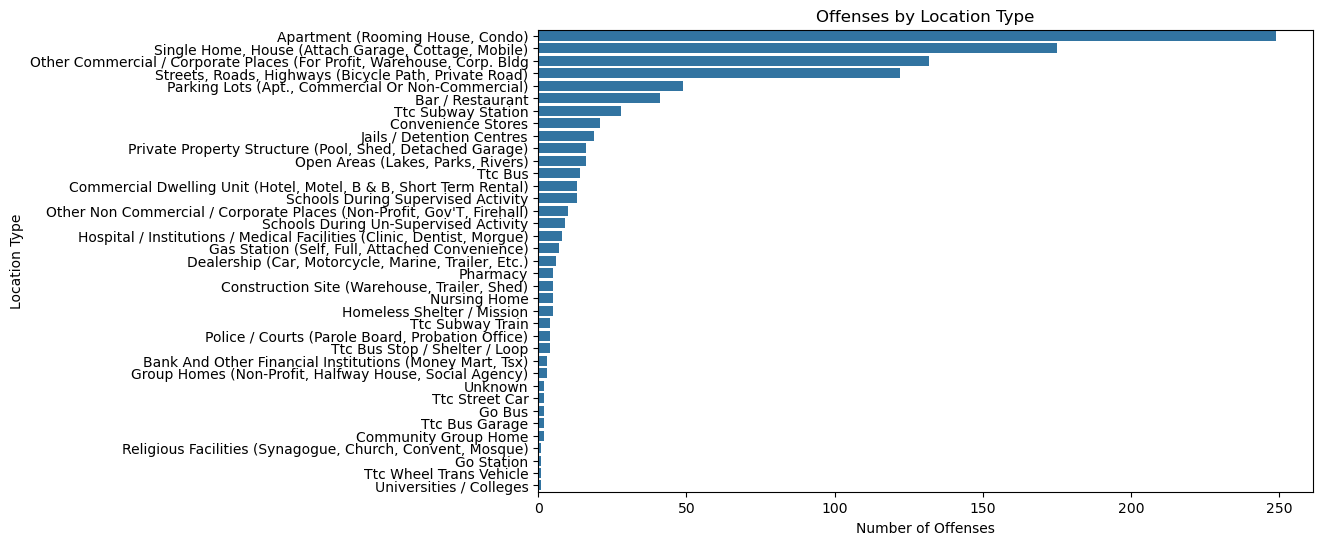

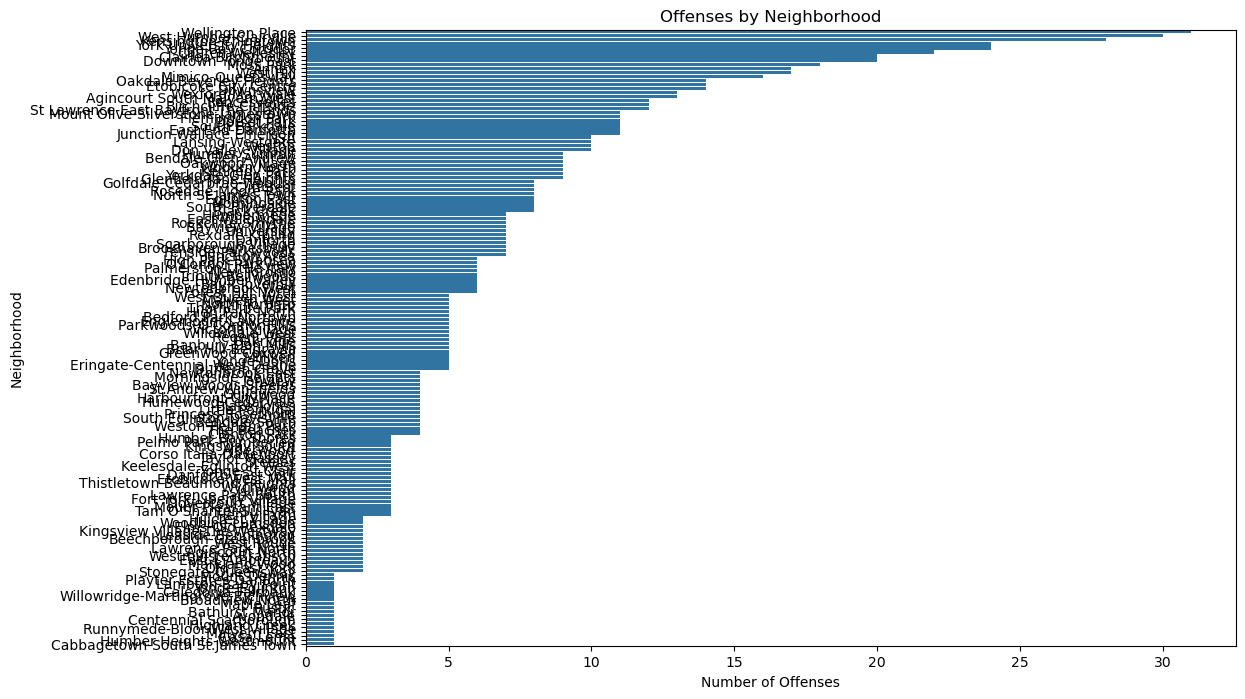

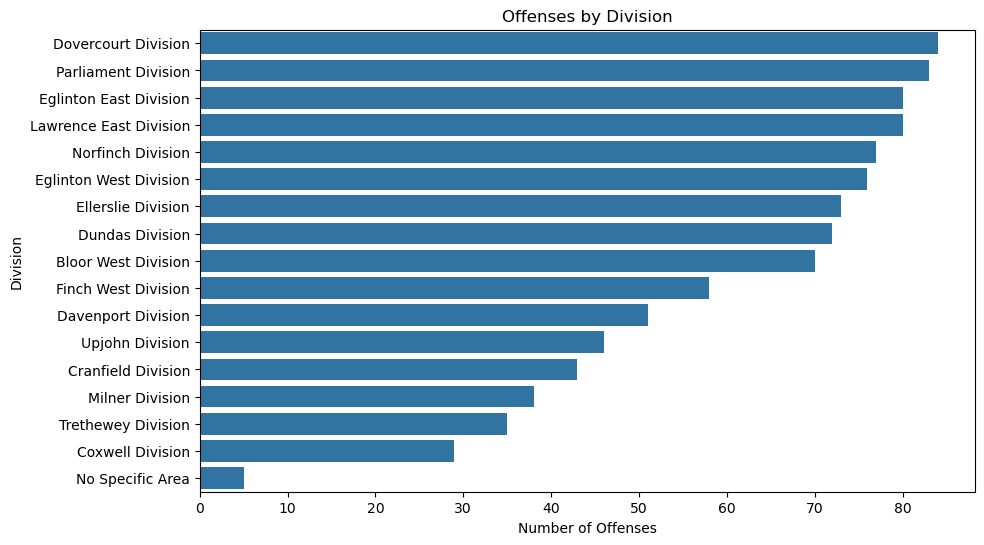

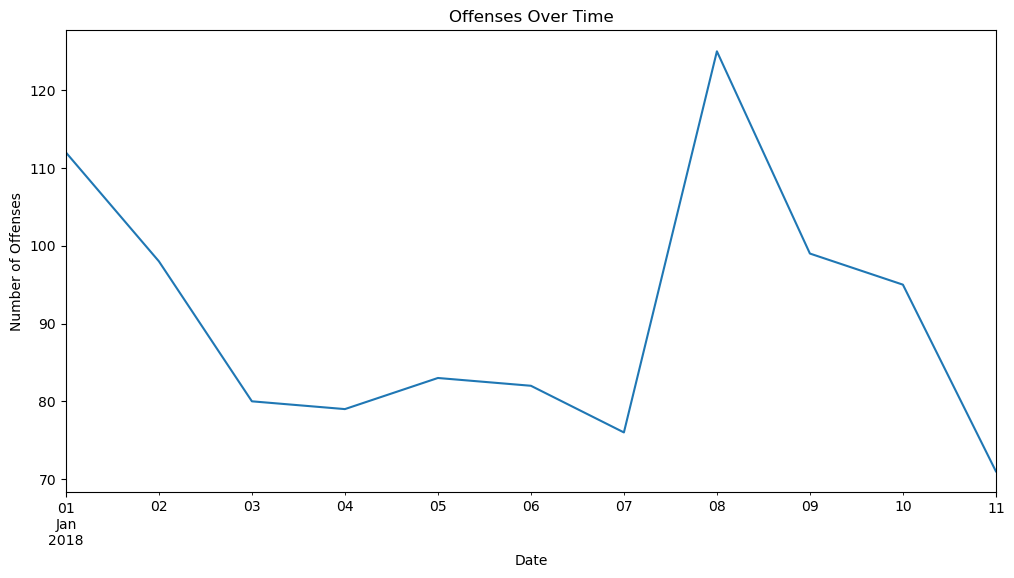

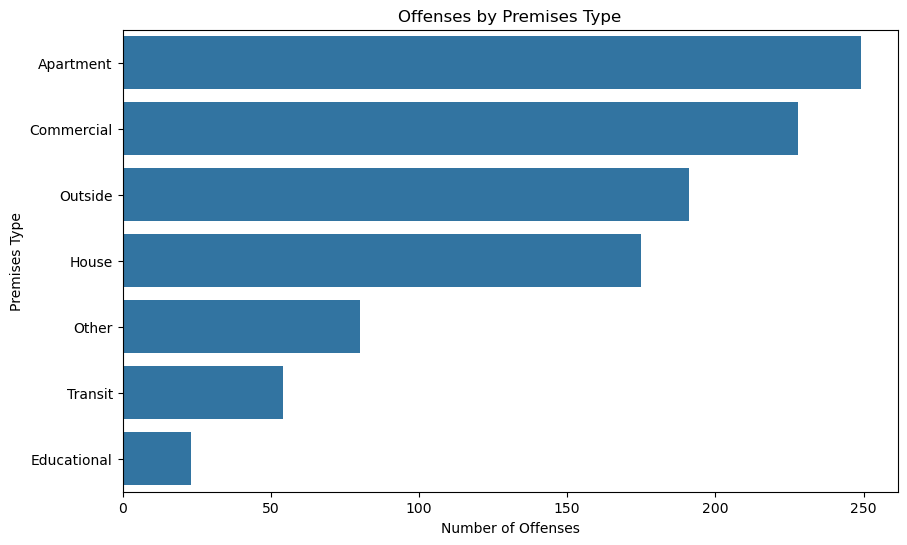

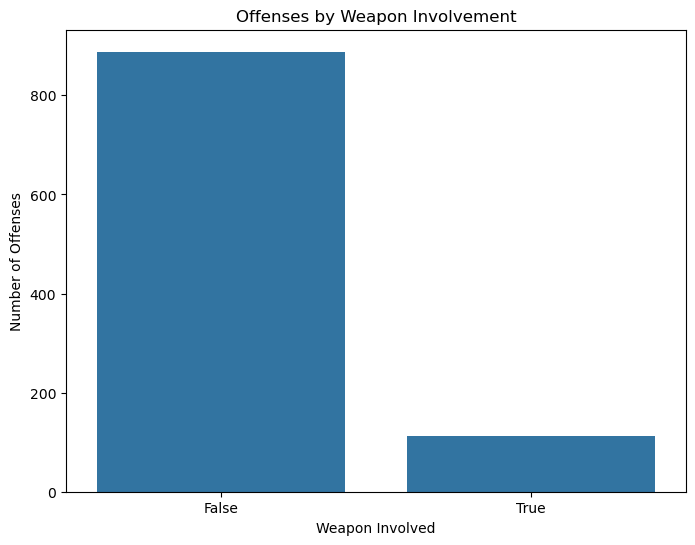

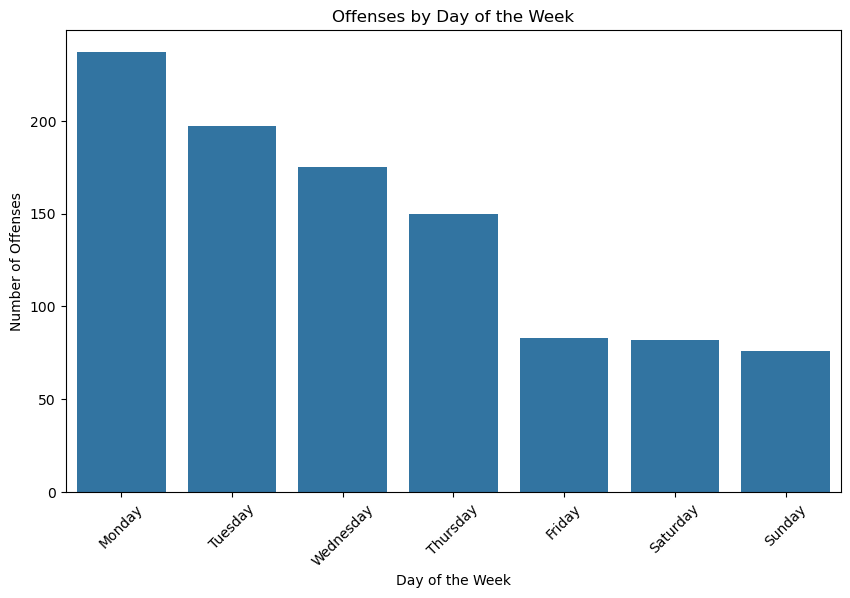

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('test.csv')

# 1. Offense Categories Distribution
plt.figure(figsize=(10, 6))
sns.countplot(y='Offence_category', data=df, order=df['Offence_category'].value_counts().index)
plt.title('Distribution of Offense Categories')
plt.xlabel('Number of Offenses')
plt.ylabel('Offense Category')
plt.show()

# 2. Offenses by Time of Day
plt.figure(figsize=(10, 6))
sns.countplot(x='Hour_category', data=df, order=['Midnight (0 - 4 AM)', 'Early Morning (4 - 8 AM)', 'Morning (8 - 12 AM)', 
                                                'Afternoon (12 - 4 PM)', 'Evening (16 -20 PM)', 'Late Night (20 -24 PM)'])
plt.title('Offenses by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Number of Offenses')
plt.xticks(rotation=45)
plt.show()

# 3. Offenses by Location Type
plt.figure(figsize=(10, 6))
sns.countplot(y='Location_type', data=df, order=df['Location_type'].value_counts().index)
plt.title('Offenses by Location Type')
plt.xlabel('Number of Offenses')
plt.ylabel('Location Type')
plt.show()

# 4. Offenses by Neighborhood
plt.figure(figsize=(12, 8))
sns.countplot(y='Neighbourhood Name', data=df, order=df['Neighbourhood Name'].value_counts().index)
plt.title('Offenses by Neighborhood')
plt.xlabel('Number of Offenses')
plt.ylabel('Neighborhood')
plt.show()

# 5. Offenses by Division
plt.figure(figsize=(10, 6))
sns.countplot(y='Division_name', data=df, order=df['Division_name'].value_counts().index)
plt.title('Offenses by Division')
plt.xlabel('Number of Offenses')
plt.ylabel('Division')
plt.show()

# 6. Offenses Over Time
df['Report_Date'] = pd.to_datetime(df['Report_Date'])
df.set_index('Report_Date', inplace=True)
plt.figure(figsize=(12, 6))
df.resample('D').size().plot()
plt.title('Offenses Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Offenses')
plt.show()

# 7. Offenses by Premises Type
plt.figure(figsize=(10, 6))
sns.countplot(y='Premises', data=df, order=df['Premises'].value_counts().index)
plt.title('Offenses by Premises Type')
plt.xlabel('Number of Offenses')
plt.ylabel('Premises Type')
plt.show()

# 8. Offenses by Weapon Involvement
df['Weapon_Involved'] = df['Offence'].apply(lambda x: 'With Weapon' in x)
plt.figure(figsize=(8, 6))
sns.countplot(x='Weapon_Involved', data=df)
plt.title('Offenses by Weapon Involvement')
plt.xlabel('Weapon Involved')
plt.ylabel('Number of Offenses')
plt.show()

# # 9. Geographical Distribution of Offenses
# plt.figure(figsize=(10, 8))
# sns.scatterplot(x='Longitude', y='Latitude', data=df, hue='Offence_category', alpha=0.6)
# plt.title('Geographical Distribution of Offenses')
# plt.xlabel('Longitude')
# plt.ylabel('Latitude')
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.show()

# 10. Comparison of Offenses by Day of the Week
df['Day_of_Week'] = df.index.day_name()
plt.figure(figsize=(10, 6))
sns.countplot(x='Day_of_Week', data=df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Offenses by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Offenses')
plt.xticks(rotation=45)
plt.show()